Importing dependancies/libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

Checking and preprocessing the data

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
# Dimension of an image(which is in the form of a matrix)
X_train[0].shape

(28, 28)

In [6]:
# Matrix present in 2nd index of the X_train
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

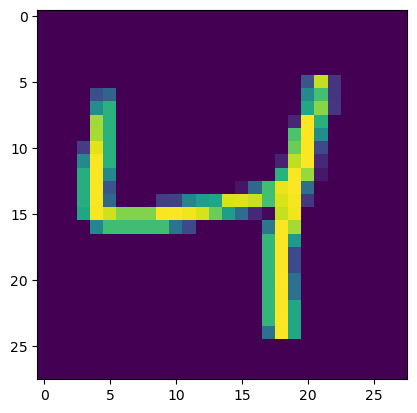

In [7]:
# Image present in 2nd index of X_train
plt.imshow(X_train[2])
plt.show()

In [8]:
# Result present in 2nd index of Y_train (Result of image)
Y_train[2]

4

In [9]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
# Scaling the values in the matrix
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
# Conversion of 2D array matrix into 1D array to make a layer
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [13]:
X_test_flattened.shape
# Gives (No. of images present, dimension of an image(here, 784 pixel's luminosity values))

(10000, 784)

Making of model (with no hidden layer)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(units = 784, activation = "sigmoid"),
    keras.layers.Dense(units = 10, activation = "sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs = 5)



Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3321 - accuracy: 0.9042
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1664 - accuracy: 0.9505
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1074 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0738 - accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0526 - accuracy: 0.9836


Testing the model on the test samples

In [15]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0739 - accuracy: 0.9787


[0.07385369390249252, 0.9786999821662903]

Checking the internal working of model prediction

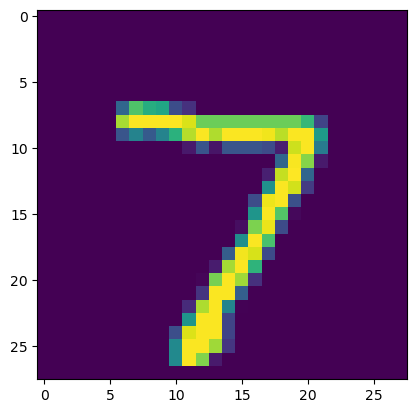

In [16]:
plt.imshow(X_test[0])
plt.show()

In [17]:
# Storing all the predictions made by the model in Y_predicted
Y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 4ms/step


In [18]:
# This will give us 10 values telling the probability of the image corresponding to that digit (0-9)
Y_predicted[0]

array([1.9765736e-03, 6.4621138e-04, 3.3612913e-01, 9.6789700e-01,
       3.9003012e-04, 3.5516758e-02, 4.7677619e-07, 9.9999338e-01,
       5.0528686e-02, 8.8030972e-02], dtype=float32)

In [19]:
# Outputs the class of digit(0-9) having the highest probability
np.argmax(Y_predicted[0])

7

Making confusion matrix

In [20]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
CM = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted_labels)
CM

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    5,    1,    1,    2,    3,    2,    2,    3],
       [   0, 1124,    4,    0,    0,    1,    2,    1,    3,    0],
       [   1,    2, 1017,    0,    1,    0,    2,    7,    2,    0],
       [   0,    0,    7,  985,    1,    0,    0,    6,    4,    7],
       [   0,    0,    5,    0,  966,    0,    3,    2,    1,    5],
       [   3,    1,    0,   11,    3,  857,    6,    1,    6,    4],
       [   4,    2,    3,    1,    4,    3,  939,    0,    2,    0],
       [   0,    2,   10,    1,    0,    0,    0, 1012,    0,    3],
       [   1,    0,    7,    3,    6,    2,    3,    4,  945,    3],
       [   1,    2,    0,    4,   13,    1,    0,    7,    0,  981]])>

Making the model with a hidden layer

In [23]:
model = keras.Sequential([
    keras.layers.Dense(units = 784, activation = "relu"),
    keras.layers.Dense(units = 100, activation = "sigmoid"),
    keras.layers.Dense(units = 10, activation = "sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs = 5)



Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2132 - accuracy: 0.9405
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0774 - accuracy: 0.9763
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0494 - accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0264 - accuracy: 0.9914


In [24]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9773


[0.07264825701713562, 0.9772999882698059]

In [25]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
CM = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted_labels)
CM

313/313 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    2,    1,    0,    1,    1,    0,    1,    1],
       [   0, 1127,    4,    0,    0,    0,    2,    0,    2,    0],
       [   1,    0, 1018,    2,    2,    0,    2,    4,    2,    1],
       [   0,    0,    8,  980,    0,    3,    0,    5,    9,    5],
       [   0,    0,    6,    0,  918,    0,    4,    1,    3,   50],
       [   2,    0,    0,   12,    1,  865,    4,    1,    4,    3],
       [   2,    2,    1,    1,    2,    5,  944,    0,    0,    1],
       [   2,    4,    9,    1,    0,    0,    0, 1005,    2,    5],
       [   2,    1,    2,    7,    0,    5,    2,    2,  949,    4],
       [   3,    2,    0,    2,    2,    1,    0,    1,    3,  995]])>

Checking the model for user made digits

In [26]:
img = cv2.imread('eight.png')

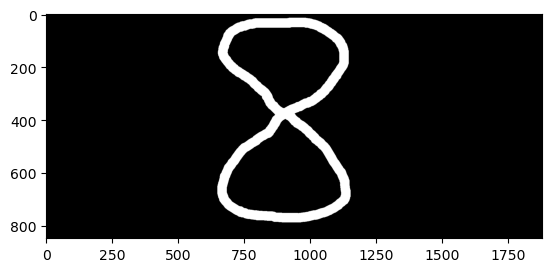

In [27]:
plt.imshow(img)
plt.show()

In [28]:
img.shape

(848, 1879, 3)

In [29]:
# Image converted to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [30]:
# Earlier, image was having 3 channels (BGR), but now it only have 1 channel (Gray)
gray.shape

(848, 1879)

In [31]:
# Now, we have to change the image matrix from 848 x 1879 into 28 x 28
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [32]:
resized.shape

(28, 28)

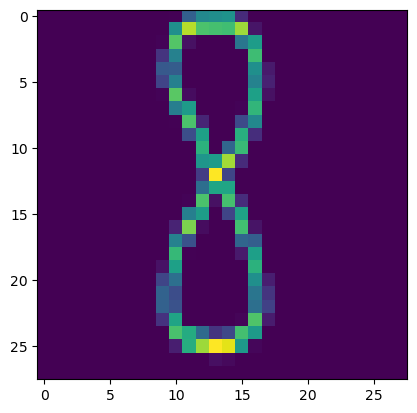

In [33]:
plt.imshow(resized)
plt.show()

In [34]:
resized = resized/255

In [35]:
resized_flattened = resized.reshape(1, 28 * 28)

In [36]:
resized_flattened.shape

(1, 784)

In [37]:
img_prediction = model.predict(resized_flattened)
img_prediction

1/1 [==============================] - 0s 16ms/step


array([[2.7082149e-02, 5.6061111e-03, 6.0495578e-02, 2.3448107e-01,
        8.8245091e-05, 4.1040245e-01, 5.6746340e-01, 8.8072959e-03,
        9.7514737e-01, 1.5646109e-02]], dtype=float32)

In [38]:
np.argmax(img_prediction)

8

# Real Time Digit Detection

In [39]:
cap = cv2.VideoCapture("screen_recording.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

text = "Some text in a box!"
font = cv2.FONT_HERSHEY_PLAIN
font_scale = 1.5
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cntr = 0;

while True:
    ret, frame = cap.read()
    cntr = cntr + 1;
    if ((cntr % 2) == 0):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
        resized = resized/255
        resized_flattened = resized.reshape(1, 28 * 28)
        img_prediction = model.predict(resized_flattened)
        status = np.argmax(img_prediction)
        print(status)
        print(type(status))

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 255, 0), -1)
        cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 2)

        cv2.imshow("Real Time Handwritten Digit Recognition", frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 16ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 52ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 31ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 54ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 31ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 50ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
5
<class 'numpy.int64'>
1/1 [=======